Student Performance Indicator

Life cycle Management of ML Project

1) Understanding the Problem Statement

2) Data Collection

3) Data Checks to perform

4) Exploratory data analysis

5) Data Pre-Processing

6) Model Training

7) Choose best model

1) This project helps us to understand how the student's performance(test scores) is affected by other variables such as Gender,Ethenicity,parental level of education, Lunch and test performance

2)  Data Collection

2.1) Import important libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import data 

In [12]:
df=pd.read_csv(r'F:\MLProject\notebook\data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

In [14]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

In [15]:
df.duplicated().sum()

0

There are no duplicates in dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 checking the number of unique values of each column

In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### check statistics of data

In [19]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

->All the means of above columns are very close to eavh other.

->all std deviations are close to each other.

->While there is minimum score of 0 for math , for writing minimum is much higher i.e 10 and for reading the minimum score is 17.

### Exploring Data

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
print("Categories in 'gender' variable: ",end="")
print(df['gender'].unique())

print("Categories in 'race ethnicity': ",end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education': ",end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch': ",end="")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course': ",end="")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': ['standard' 'free/reduced']
Categories in 'test_preparation_course': ['none' 'completed']


In [24]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

#print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [26]:
# Adding columns total score and average

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [27]:
reading_full = df[df['reading_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()
math_full = df[df['math_score']==100]['Average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in reading: {reading_full}")


Number of students with full marks in Maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [29]:
reading_less_than_20=df[df['reading_score']<=20]['Average'].count()
writing_less_than_20=df[df['writing_score']<=20]['Average'].count()
math_less_than_20 =df[df['math_score']<=20]['Average'].count()

print(f"Number of students with marks in Maths less than 20: {math_less_than_20}")
print(f"Number of students with marks in writing less than 20: {writing_less_than_20}")
print(f"Number of students with marks in reading less than 20: {reading_less_than_20}")

Number of students with marks in Maths less than 20: 4
Number of students with marks in writing less than 20: 3
Number of students with marks in reading less than 20: 1


From above data,

we get that students have performed worst in maths.

Students have performed the best in reading

### Exploring data(Visualization)

Visualize the average score distribution to make conclusion

-> Histogram

-> Kernel Distribution Function (KDE)

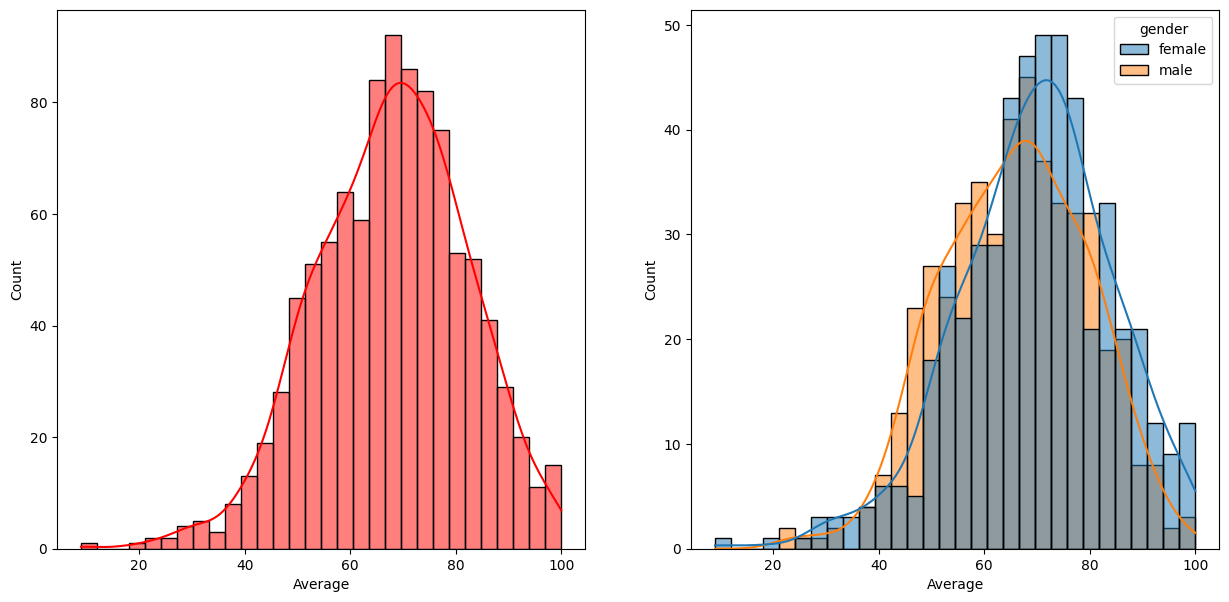

In [31]:
#Histogram and KDE

fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender')
plt.show()

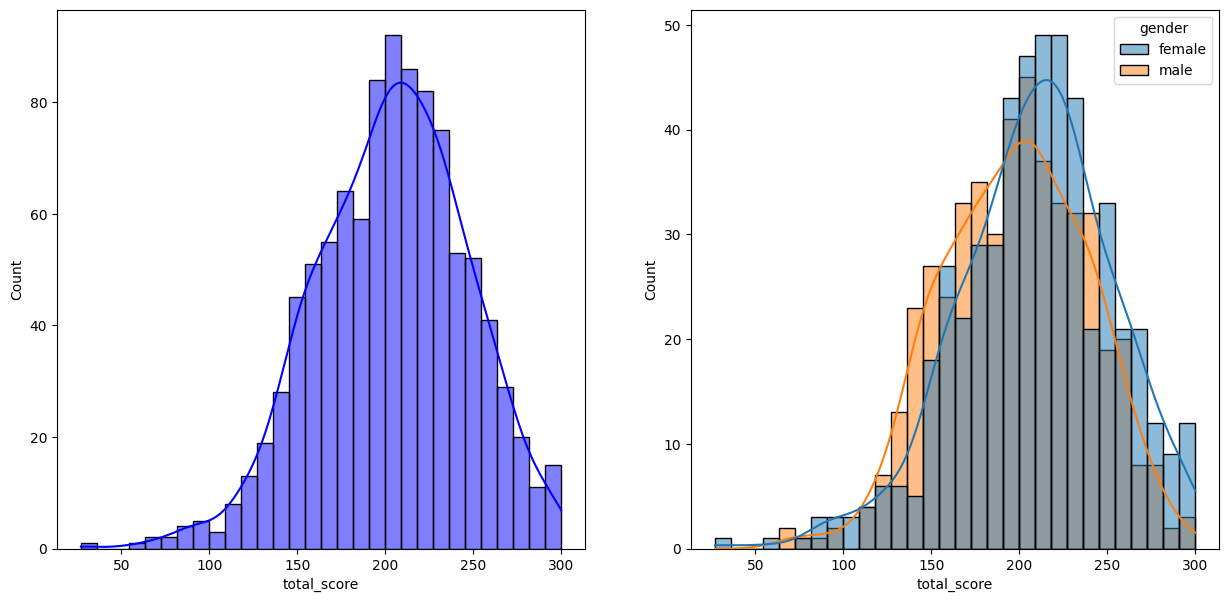

In [32]:
fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()

Insights:

-> Female Students tend to perform better than male students

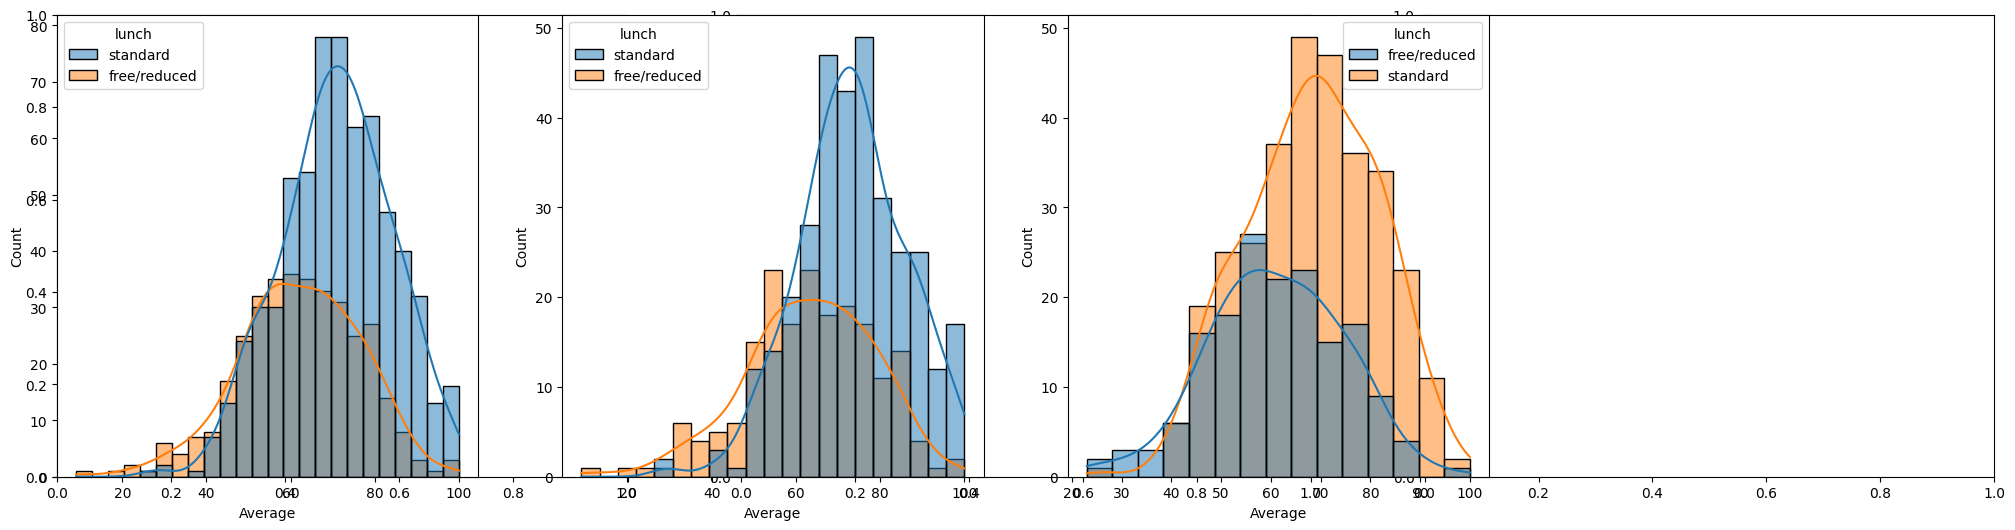

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

Insights

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

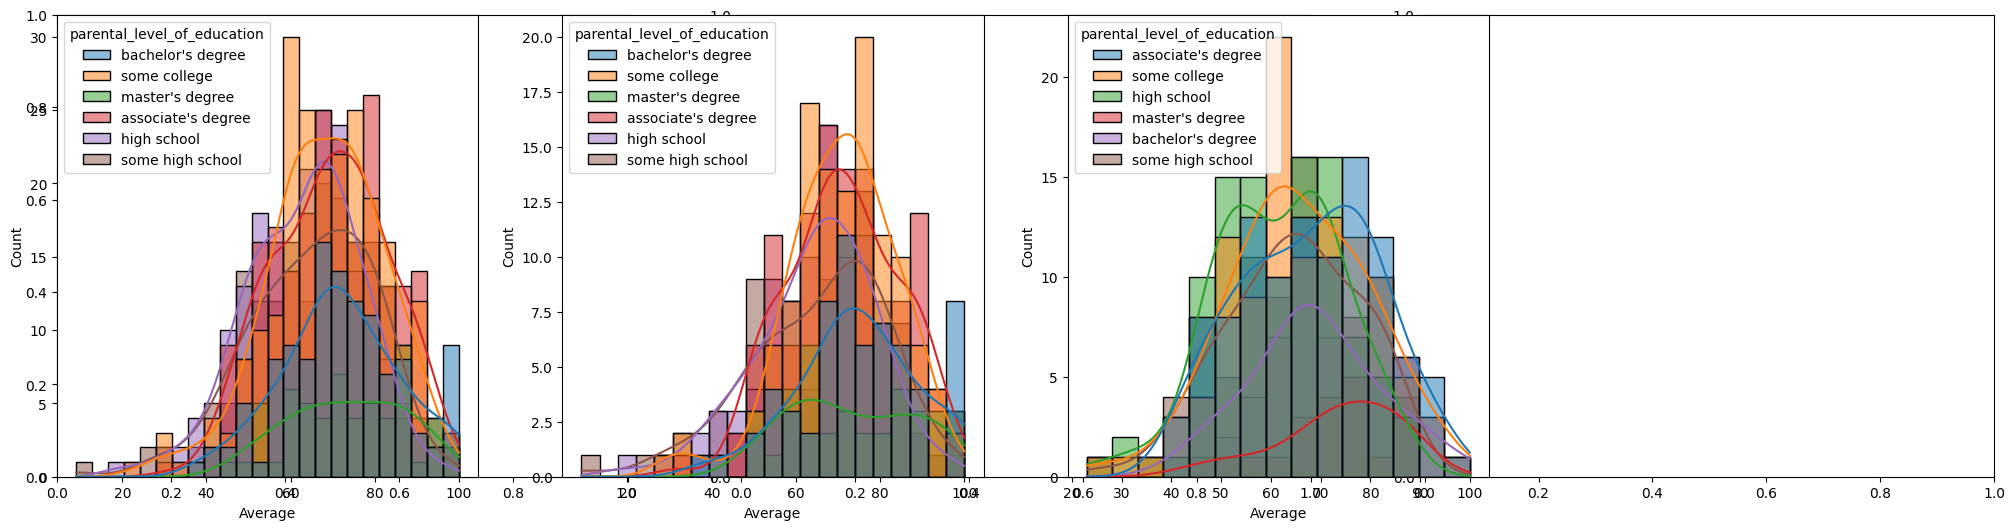

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
In general parent's education don't help student perform well in exam. 

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.